
それぞれについてJupyter Notebookにマークダウン形式で記述してください。


- (1) 物体検出の分野にはどういった手法が存在したか。


- (2) Fasterとあるが、どういった仕組みで高速化したのか。


- (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。


- (4) RPNとは何か。


- (5) RoIプーリングとは何か。


- (6) Anchorのサイズはどうするのが適切か。


- (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。


- (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

https://arxiv.org/pdf/1506.01497.pdf



(1) 物体検出の分野にはどういった手法が存在したか。
SPPnetやFastR-CNNという手法を用いて解析をしている。
the success of region proposal methods (e.g., [4])
and region-based convolutional neural networks (RCNNs)
[5].
The latest
incarnation, Fast R-CNN [2], achieves near real-time
rates using very deep networks [3],

(2) Fasterとあるが、どういった仕組みで高速化したのか。
- Faster R-CNN, is composed of two modules. The first module is a deep fully convolutional network that proposes regions, and the second module is the Fast R-CNN detector 
- RPNは数多くのアンカーボックスを作成することで、画像の中心点を明らかにすることで適切なBOXサイズを作成する。
- ① ある矩形の中身が物体なのか背景(=何も写っていない)なのかを学習
- ② ①で検出した場所に、具体的に何が写っているのかを学習
- という2段構造です。Faster R-CNNの偉い所は①においてResion Proposal Network(RPN)と呼ばれるCNN構造を用いたところです。




RPNの構造の概要：
RPNはそれ自体が「ある画像のどこに物体が写っているか」=「物体が写っている場所と、その矩形の形」を検出できる機械学習モデルです。


[2]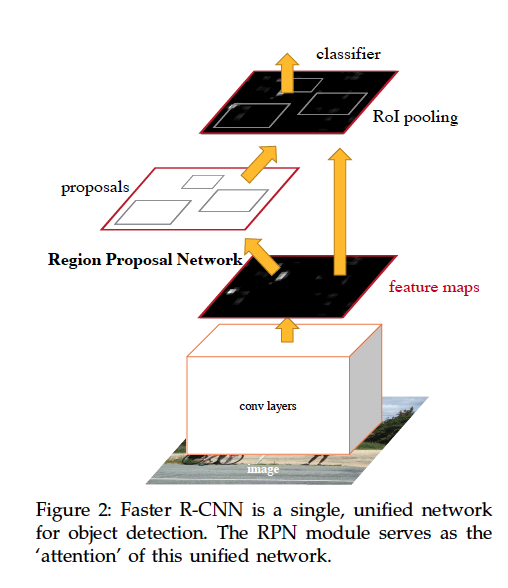

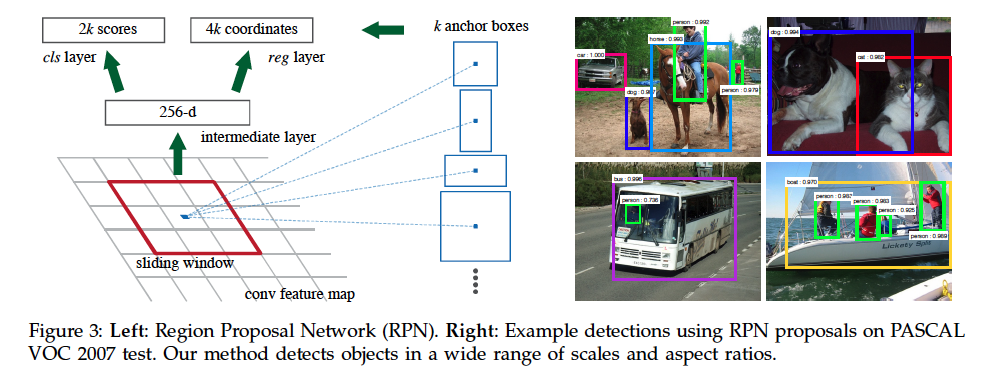

- (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

One-Stageの手法はクラス別検出パイプラインである。
Two-Stageの手法はクラスを問わない

OverFeat論文[9]では、検出方法として 畳み込み特徴マップ上のスライディングウィンドウに回帰器と分類器を使用する検出方法を提案しています．畳み込み特徴マップ上のスライディングウィンドウを用いた検出方法を提案しています．OverFeat は，クラスに特化した1段階の検出パイプラインであり，我々の は、クラスを特定しない提案とクラスを特定した検出の2段階のカスケードで構成されています。とクラス固有の検出からなる2段階のカスケードです。

２STAGEはクラスを特定しないない内容と特定するカスケードで構成されているもの。

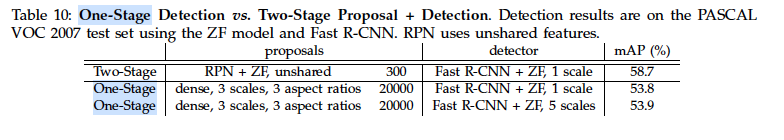

- (4) RPNとは何か。

> A Region Proposal Network (RPN) takes an image (of any size) as input and outputs a set of rectangular object proposals, each with an objectness score.3 We model this process with a fully convolutional network[7], which we describe in this section.

- (5) RoIプーリングとは何か。
入力を固定長に変換するアルゴリズムを適用し、入力特徴マップのサイズにかかわらず固定長の長さに変換する。RoI pooling layer that is differentiable w.r.t. the box coordinates.

- (6) Anchorのサイズはどうするのが適切か。
At each sliding-window location, we simultaneously predict multiple region proposals, where the number of maximum possible proposals for each location is denoted as k. So the reg layer has 4k outputs encoding the coordinates of k boxes, and the cls layer outputs 2k scores that estimate probability of object or not object for each proposal4. The k proposals are parameterized relative to k reference boxes, which we call anchors. An anchor is centered at the sliding window in question, and is associated with a scale and aspect ratio (Figure 3, left). By default we use 3 scales and 3 aspect ratios, yielding k = 9 anchors at each sliding position. For a convolutional feature map of a size W  H (typically 2,400), there are WHk anchors in total.

>各スライディングウィンドウの位置で、複数の領域提案を同時に予測し、各位置で可能な最大提案数をkとします。したがって、reg層はk個のボックスの座標をコード化した4k個の出力を持ち、cls層は各提案について物体か非物体かの確率を推定する2k個のスコアを出力します4。k個のプロポーザルは、アンカーと呼ばれるk個の参照ボックスに対してパラメータ化されている。アンカーは、対象となるスライディングウィンドウを中心とし、スケールとアスペクト比に関連付けられています（図3左）。デフォルトでは、3つのスケールと3つのアスペクト比を使用しており、各スライド位置にk = 9個のアンカーを配置しています。サイズW H（通常2400）の畳み込み特徴マップでは、合計WHk個のアンカーが存在します。

- (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。
We comprehensively evaluate our method on the PASCAL VOC 2007 detection benchmark [11]. This dataset consists of about 5k trainval images and 5k test images over 20 object categories. We also provide results on the PASCAL VOC 2012 benchmark for a few models.

>我々の手法は，PASCAL VOC 2007 検出ベンチマーク[11]で総合的に評価した．このデータセットは，約5kの訓練画像と約5kのテスト画像で構成されており，20のオブジェクトカテゴリが含まれている．また，いくつかのモデルについては，PASCAL VOC 2012ベンチマークでの結果も示している．ここでは，物体提案の代理指標ではなく，実際の物体検出の指標である平均平均精度（mAP）を主に評価しています．
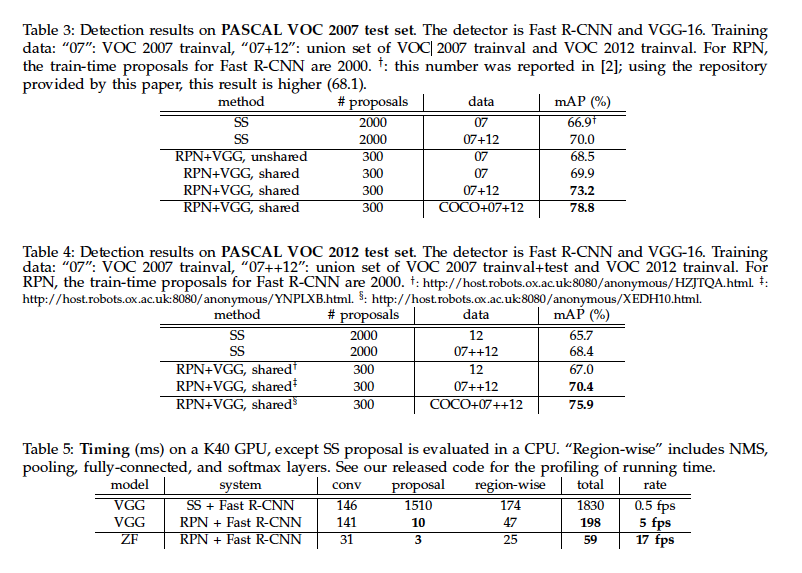